# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [18]:
from selenium import webdriver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs


In [4]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [8]:
# scrape the names of the items on the webpage above
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=options)
driver.get(url)
d = {}
d['item'] = []
for item in driver.find_elements_by_css_selector('div.product-name'):
    item_name = item.find_element_by_css_selector('h3').text
    d['item'].append(item_name)
    # item_name = item.find_element_by_css_selector('h3').text



{'item': ['Greenies Regular Dental Dog Treats', 'Greenies Teenie Dental Dog Treats', 'Greenies Large Dental Dog Treats', 'Greenies Petite Dental Dog Treats', 'Authority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free', 'WHIMZEES Brushzees Dental Dog Treat - Natural, Grain Free, 1 Count', 'Pedigree Dentastix Triple Action Dental Dog Treats - Variety Pack', 'Pedigree Dentastix Large Dog Treats', 'Pedigree Dentastix Large Dog Sticks', 'Authority® Dental & DHA Rings Puppy Treats Parsley Mint - Gluten Free, Grain Free', 'WHIMZEES Veggie Sausage Dog Dental Treat - Natural, 1 Count', 'Pedigree Dentastix Small/Medium Dog Sticks', 'Pedigree Dentastix Triple Action Small Dog Treats - Fresh', 'Greenies Teenie Dog Dental Treats - Blueberry', 'WHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free', 'Virbac® C.E.T.® VeggieDent® Tartar Control Dog Chews', 'Yummy Combs® Ingenious Flossing Dog Dental Treat - 1 Count', 'Pedigree Dentastix Mini Dog Sticks', 'Pedigree D

In [3]:
# load the data into a dataframe file
df = pd.DataFrame.from_dict(d)

In [13]:
# save the data as a csv file
df.to_csv('./data/petsmart_treat_names.csv')

In [14]:
# display df.head()
df.head()

,item
0,Greenies Regular Dental Dog Treats
1,Greenies Teenie Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Greenies Petite Dental Dog Treats
4,Authority® Dental & DHA Stick Puppy Treats Par...


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [16]:
# load in the dataframe, notice it only contains columns salaries, NPS Score, eventOutcome
data = pd.read_csv('./data/part2.csv')
data.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [26]:
def zscores(arr):
    return (arr-arr.mean())/arr.std()
    
# data['salaries']
# (dist-dist.mean())/dist.std()

# scs.zscore(data['salaries'], ddof=)

0      -1.460155
1      -0.793981
2       0.014926
3      -0.242545
4       0.199405
          ...   
4995    0.156660
4996    1.143046
4997   -0.954463
4998   -0.682494
4999   -0.510014
Name: salaries, Length: 5000, dtype: float64

In [27]:
data.columns

Index(['salaries', 'NPS Score', 'eventOutcome'], dtype='object')

In [28]:
# calculate the zscore for each column and store them as a new column with the names used above
for column in data.columns:
    data[column+'_zscores'] = zscores(data[column])
data.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460155,-0.913522,-1.103166
1,46777.0,-12.0,2,-0.793981,-1.080668,-0.668095
2,50013.0,50.0,5,0.014926,0.991947,0.637118
3,48983.0,-13.0,0,-0.242545,-1.114097,-1.538237
4,50751.0,-11.0,6,0.199405,-1.047239,1.072189


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

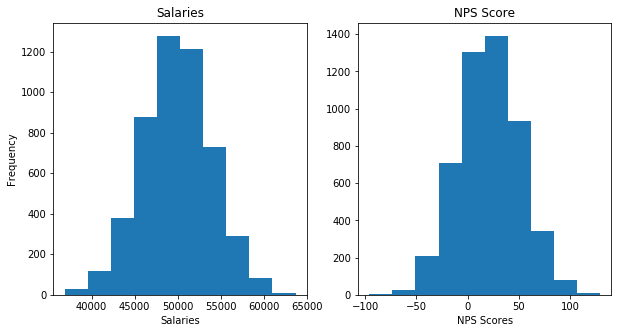

In [44]:
# plot for raw salaries and NPS Score data goes here
figs, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].hist(data['salaries'])
ax[0].set_title('Salaries')
ax[0].set_xlabel('Salaries')
ax[0].set_ylabel('Frequency')
ax[1].hist(data['NPS Score'])
ax[1].set_title('NPS Score')
ax[1].set_xlabel('NPS Scores');

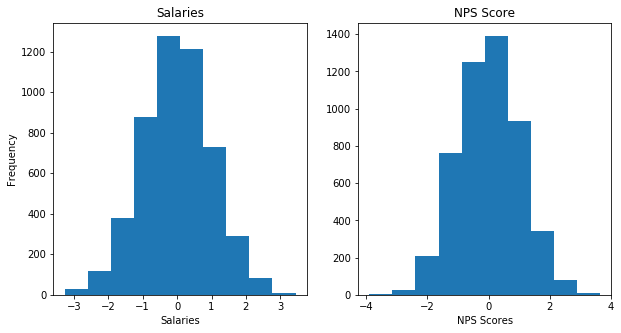

In [45]:
# plot for zscores for salaries and NPS Score data goes here
figs, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].hist(data['salaries_zscores'])
ax[0].set_title('Salaries')
ax[0].set_xlabel('Salaries')
ax[0].set_ylabel('Frequency')
ax[1].hist(data['NPS Score_zscores'])
ax[1].set_title('NPS Score')
ax[1].set_xlabel('NPS Scores');

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [59]:
pmf = data['eventOutcome'].value_counts().sort_index() / len(data['eventOutcome'])
pmf

0    0.1248
1    0.1216
2    0.1184
3    0.1272
4    0.1332
5    0.1182
6    0.1244
7    0.1322
Name: eventOutcome, dtype: float64

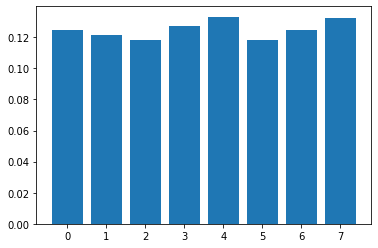

In [72]:
plt.bar(pmf.index, pmf, data=pmf);

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

In [85]:
scale = goodies.std()
norm_goods = scs.norm(loc = 100, scale=scale)
norm_goods = norm_goods.cdf(100)
x_axis = np.linspace(norm_goods.ppf(0.01), norm_goods.ppf(0.99), 1000)
goodies = data['eventOutcome']
probs = norm_goods.pdf(x_axis)


plt.scatter(x_axis, probs)

AttributeError: 'numpy.float64' object has no attribute 'ppf'

# Level Up:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

* plot the pdf and cdf of a given distribution

In [10]:
# find salaries with zscores <= 2.0 

In [11]:
# calculate skewness and kurtosis of NPS Score column

# Plotting a pdf and cdf of a normal distribution
A survey is taken that finds that students send an mean average of 80 DMs a day with a standard deviation of 6 DMS. 

In [13]:
# plot the pdf and cdf of this normal distribution. level up if you can do it in subplots

In [14]:
# what is the probability of drawing a student that sends at least 82 DMs a day?

A second survey is taken at another bootcamp that shows that students send a mean average of
80 DMs a day, but they have a standard deviation of 9 DMS.  

In [15]:
# What is the difference in the probability of finding a student that sends, at most, 65 DMs a day? 

# run the cell below to convert your notebook to a README for assessment

In [ ]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md